## Notebook 1: Manipulacion y visualizacion de datos

#### pandas: https://pandas.pydata.org/pandas-docs/stable/
#### numpy: http://www.numpy.org/
#### matplotlib: https://matplotlib.org/contents.html
#### seaborn: https://seaborn.pydata.org/

In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Importar los datos desde un csv

In [2]:
# path of nasa climate data
data_path = 'data/climate/nasa-ghgases-co2-mean.csv'
# read data with pandas
co2_data = pd.read_csv(data_path)

In [3]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
year            162 non-null int64
co2_ppm_mean    162 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB


In [4]:
# list the top 7 rows
co2_data.head(7)

,year,co2_ppm_mean
0,1850,285.2
1,1851,285.1
2,1852,285.0
3,1853,285.0
4,1854,284.9
5,1855,285.1
6,1856,285.4


### Localizar por index

In [5]:
# select subset of dataframe based on index with iloc
co2_data.iloc[7:12]

,year,co2_ppm_mean
7,1857,285.6
8,1858,285.9
9,1859,286.1
10,1860,286.4
11,1861,286.6


In [6]:
# select columns in a different order and print head of dataframe
co2_data[['co2_ppm_mean', 'year']].head()

,co2_ppm_mean,year
0,285.2,1850
1,285.1,1851
2,285.0,1852
3,285.0,1853
4,284.9,1854


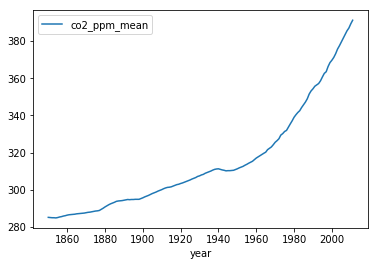

In [7]:
co2_data.plot(x='year', y='co2_ppm_mean')

In [8]:
# Add the decade column
co2_data['decade'] = co2_data['year'].round(-1)
co2_data.head()

,year,co2_ppm_mean,decade
0,1850,285.2,1850
1,1851,285.1,1850
2,1852,285.0,1850
3,1853,285.0,1850
4,1854,284.9,1850


In [9]:
# Group by decade
by_decade = co2_data[['decade', 'co2_ppm_mean']].groupby('decade').mean()
by_decade

,co2_ppm_mean
decade,
1850,285.040000
1860,286.236364
1870,287.733333
1880,290.790909
1890,294.377778
1900,295.981818
1910,300.066667
1920,303.427273
1930,307.533333


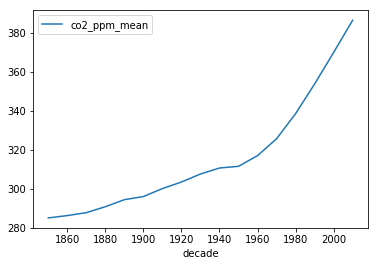

In [10]:
by_decade.plot();

In [11]:
co2_data.columns

Index(['year', 'co2_ppm_mean', 'decade'], dtype='object')

In [12]:
# read gistemp 5 year mean 
# The GISS Surface Temperature Analysis (GISTEMP) is an estimate of global surface temperature change.
# explanation about gistemp: https://data.giss.nasa.gov/gistemp/ 
gistemp_data = pd.read_csv('data/climate/nasa-gistemp-5year-mean.csv')

In [13]:
gistemp_data.head()

,year,fiveyear_mean
0,1882,-0.48
1,1883,-0.48
2,1884,-0.52
3,1885,-0.58
4,1886,-0.60


In [14]:
# lets create a dataframe with co2 data and gistemp
df = pd.merge(co2_data[['year', 'co2_ppm_mean']], gistemp_data, on='year', how='outer')
df

,year,co2_ppm_mean,fiveyear_mean
0,1850,285.20,NaN
1,1851,285.10,NaN
2,1852,285.00,NaN
3,1853,285.00,NaN
4,1854,284.90,NaN
5,1855,285.10,NaN
6,1856,285.40,NaN
7,1857,285.60,NaN
8,1858,285.90,NaN
9,1859,286.10,NaN


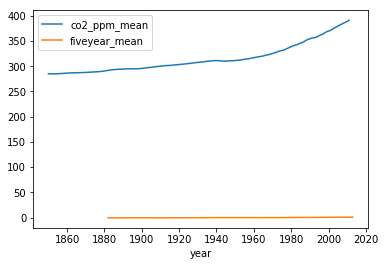

In [15]:
df.plot(x='year')

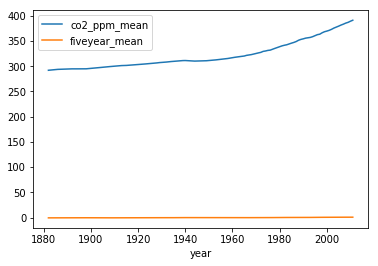

In [16]:
#Drop columns with nans
df.dropna().plot(x='year')

In [17]:
df

,year,co2_ppm_mean,fiveyear_mean
0,1850,285.20,NaN
1,1851,285.10,NaN
2,1852,285.00,NaN
3,1853,285.00,NaN
4,1854,284.90,NaN
5,1855,285.10,NaN
6,1856,285.40,NaN
7,1857,285.60,NaN
8,1858,285.90,NaN
9,1859,286.10,NaN


In [18]:
# lets normalize co2_ppm_mean just to view it in the same graph
df['co2_ppm_normalized'] = (df.co2_ppm_mean - df.co2_ppm_mean.min()) / (df.co2_ppm_mean.max() - df.co2_ppm_mean.min())

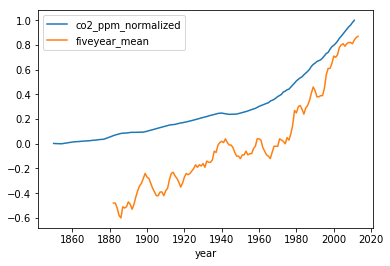

In [19]:
df[['year', 'co2_ppm_normalized', 'fiveyear_mean']].plot(x='year')

In [20]:
df.corr()

,year,co2_ppm_mean,fiveyear_mean,co2_ppm_normalized
year,1.000000,0.922444,0.938047,0.922444
co2_ppm_mean,0.922444,1.000000,0.976197,1.000000
fiveyear_mean,0.938047,0.976197,1.000000,0.976197
co2_ppm_normalized,0.922444,1.000000,0.976197,1.000000


### Crear y poblar dataframes

In [21]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [22]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [23]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [24]:
df_new = pd.concat([df_a, df_b])
df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Merge, concat, append

In [25]:
pd.concat([df_a, df_b], axis=1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [26]:
pd.merge(df_new, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [27]:
pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [28]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [29]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [30]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


In [31]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


In [32]:
pd.merge(df_a, df_b, on='subject_id', how='left', suffixes=('_left', '_right'))

,subject_id,first_name_left,last_name_left,first_name_right,last_name_right
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


In [33]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Seleccion condicional

In [34]:
# Create a dataframe
raw_data = {'first_name': ['Jason', 'Molly', np.nan, np.nan, np.nan], 
        'nationality': ['USA', 'USA', 'France', 'UK', 'UK'], 
        'age': [42, 52, 36, 24, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'nationality', 'age'])

In [35]:
# Create variable with TRUE if nationality is USA
american = df['nationality'] == "USA"

# Create variable with TRUE if age is greater than 50
elderly = df['age'] > 50

# Select all cases where nationality is USA and age is greater than 50
df[american & elderly]

,first_name,nationality,age
1,Molly,USA,52


In [36]:
# Select all cases where the first name is not missing and nationality is USA 
df[df['first_name'].notnull() & (df['nationality'] == "USA")]

,first_name,nationality,age
0,Jason,USA,42
1,Molly,USA,52


### Operaciones y grupos

In [37]:
data = {'Platoon': ['A','A','A','A','A','A','B','B','B','B','B','C','C','C','C','C'],
       'Casualties': [1,4,5,7,5,5,6,1,4,5,6,7,4,6,4,6]}
df = pd.DataFrame(data)
df

,Casualties,Platoon
0,1,A
1,4,A
2,5,A
3,7,A
4,5,A
5,5,A
6,6,B
7,1,B
8,4,B
9,5,B


In [38]:
# Groupby y rolling mean
df.groupby('Platoon')['Casualties'].apply(lambda x:x.rolling(center=False,window=2).mean())

0     NaN
1     2.5
2     4.5
3     6.0
4     6.0
5     5.0
6     NaN
7     3.5
8     2.5
9     4.5
10    5.5
11    NaN
12    5.5
13    5.0
14    5.0
15    5.0
Name: Casualties, dtype: float64

In [39]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [40]:
groupby_regiment = df['preTestScore'].groupby(df['regiment'])
groupby_regiment

#### Visualizando el grupo

In [41]:
list(df['preTestScore'].groupby(df['regiment']))

[('Dragoons', 4     3
  5     4
  6    24
  7    31
  Name: preTestScore, dtype: int64), ('Nighthawks', 0     4
  1    24
  2    31
  3     2
  Name: preTestScore, dtype: int64), ('Scouts', 8     2
  9     3
  10    2
  11    3
  Name: preTestScore, dtype: int64)]

In [42]:
df['preTestScore'].groupby(df['regiment']).describe()

,count,mean,std,min,25%,50%,75%,max
regiment,,,,,,,,
Dragoons,4.0,15.50,14.153916,3.0,3.75,14.0,25.75,31.0
Nighthawks,4.0,15.25,14.453950,2.0,3.50,14.0,25.75,31.0
Scouts,4.0,2.50,0.577350,2.0,2.00,2.5,3.00,3.0


In [43]:
groupby_regiment.mean()

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [44]:
df['preTestScore'].groupby([df['regiment'], df['company']]).mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

In [45]:
df['preTestScore'].groupby([df['regiment'], df['company']]).mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


In [46]:
df.groupby(['regiment', 'company']).mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

In [47]:
df.groupby(['regiment', 'company']).size()

regiment    company
Dragoons    1st        2
            2nd        2
Nighthawks  1st        2
            2nd        2
Scouts      1st        2
            2nd        2
dtype: int64

In [48]:
# Group the dataframe by regiment, and for each regiment,
for name, group in df.groupby('regiment'): 
    # print the name of the regiment
    print(name)
    # print the data of that regiment
    print(group)

Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70


In [49]:
list(df.groupby(df.dtypes, axis=1))

[(dtype('int64'),     preTestScore  postTestScore
  0              4             25
  1             24             94
  2             31             57
  3              2             62
  4              3             70
  5              4             25
  6             24             94
  7             31             57
  8              2             62
  9              3             70
  10             2             62
  11             3             70),
 (dtype('O'),       regiment company      name
  0   Nighthawks     1st    Miller
  1   Nighthawks     1st  Jacobson
  2   Nighthawks     2nd       Ali
  3   Nighthawks     2nd    Milner
  4     Dragoons     1st     Cooze
  5     Dragoons     1st     Jacon
  6     Dragoons     2nd    Ryaner
  7     Dragoons     2nd      Sone
  8       Scouts     1st     Sloan
  9       Scouts     1st     Piger
  10      Scouts     2nd     Riani
  11      Scouts     2nd       Ali)]

In [50]:
df.groupby('regiment').mean().add_prefix('mean_')

,mean_preTestScore,mean_postTestScore
regiment,,
Dragoons,15.50,61.5
Nighthawks,15.25,59.5
Scouts,2.50,66.0


#### Creando funciones

In [51]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [52]:
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)

In [53]:
df['postTestScore'].groupby(df['categories']).apply(get_stats).unstack()

,count,max,mean,min
categories,,,,
Low,2.0,25.0,25.00,25.0
Okay,0.0,NaN,NaN,NaN
Good,8.0,70.0,63.75,57.0
Great,2.0,94.0,94.00,94.0


### Datos nulos

In [54]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [55]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [56]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [57]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [58]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [59]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [60]:
df["postTestScore"].fillna(df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [61]:
# Select the rows of df where age is not NaN and sex is not NaN
df[df['age'].notnull() & df['sex'].notnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,3.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Eliminando duplicados:

In [62]:
raw_data = {'first_name': ['Jason', 'Jason', 'Jason','Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Miller', 'Miller','Ali', 'Milner', 'Cooze'], 
        'age': [42, 42, 1111111, 36, 24, 73], 
        'preTestScore': [4, 4, 4, 31, 2, 3],
        'postTestScore': [25, 25, 25, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


In [63]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [64]:
df.drop_duplicates()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


### Trabajando con fechas

In [65]:
# Create data frame
df = pd.DataFrame()

# Create two datetime features
df['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
df['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

In [66]:
# Calculate duration between features
df['Left'] - df['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [67]:
pd.Series(delta.days for delta in (df['Left'] - df['Arrived']))

0    0
1    2
dtype: int64

### Trabajando con texto

In [68]:
# Create text
text_data = ['   Interrobang. By Aishwarya Henriette     ',
             'Parking And Going. By Karl Gautier',
             '    Today Is The night. By Jarek Prakash   ']

In [69]:
# Strip whitespaces
strip_whitespace = [string.strip() for string in text_data]

In [70]:
strip_whitespace

['Interrobang. By Aishwarya Henriette',
 'Parking And Going. By Karl Gautier',
 'Today Is The night. By Jarek Prakash']

### Visualizaciones

In [71]:
df = pd.DataFrame()
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

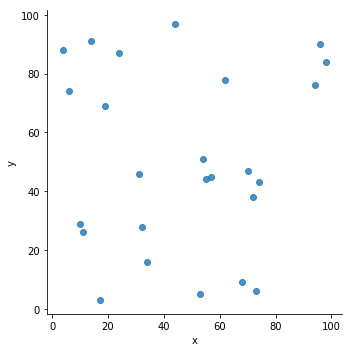

In [72]:
sns.lmplot('x', 'y', data=df, fit_reg=False)

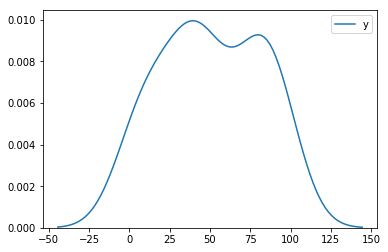

In [73]:
sns.kdeplot(df.y)

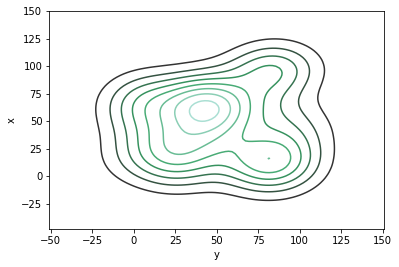

In [74]:
sns.kdeplot(df.y, df.x)

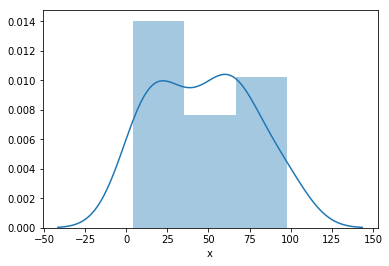

In [75]:
sns.distplot(df.x)

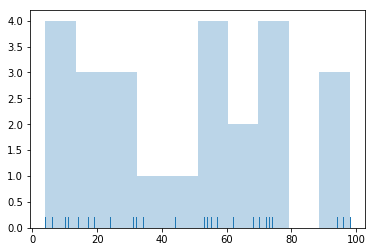

In [76]:
plt.hist(df.x, alpha=.3)
sns.rugplot(df.x);

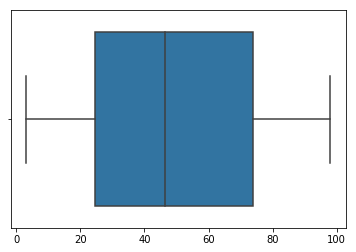

In [77]:
sns.boxplot([df.y, df.x])

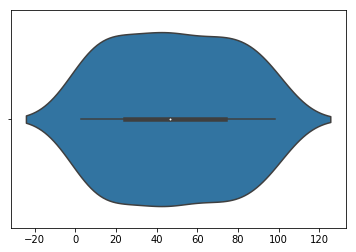

In [78]:
sns.violinplot([df.y, df.x])

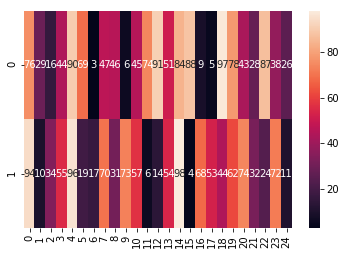

In [79]:
sns.heatmap([df.y, df.x], annot=True, fmt="d")

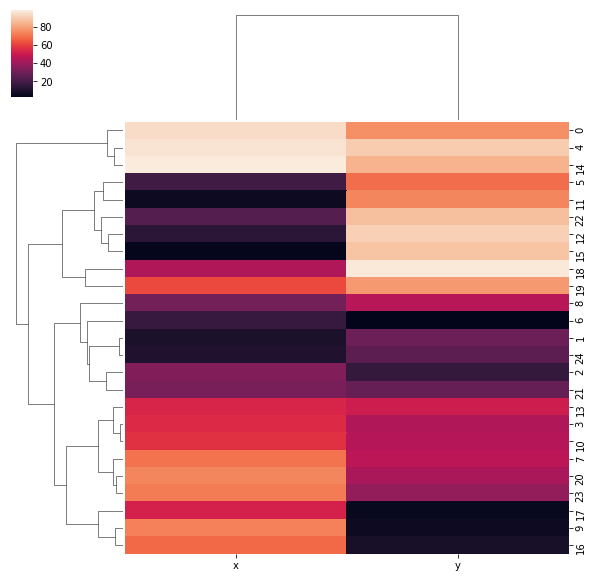

In [80]:
sns.clustermap(df)